# Transient Analysis of 2:1 Switched Capacitor DC-DC Converter

This analysis investigates the transient behavior of a 2:1 switched capacitor DC-DC converter under various operating conditions. The parameters varied include capacitance, frequency, and load resistance. The results highlight the converter's performance metrics, such as voltage ripple and settling time, for each scenario.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from scipy.optimize import minimize
import seaborn as sns


### 1. Varying Load Capacitance (`C_load`) Without Load  
- **Objective:**  
  To evaluate the transient response of the converter as `C_load` is varied from `0.01 nF` to `10.10 nF` with a fixed clock frequency of `250 kHz` under no-load conditions.  

  - #### Transient response curves for different `C_load`.

In [4]:
csv_file_path = 'results/capacitance_simulation_results.csv'
df1 = pd.read_csv(csv_file_path)
capacitor_values = df1['C(nF)'].unique()
print(capacitor_values)

[1.000e-02 5.100e-01 1.010e+00 1.510e+00 2.010e+00 2.510e+00 3.010e+00
 3.510e+00 4.010e+00 4.510e+00 5.010e+00 5.510e+00 6.010e+00 6.510e+00
 7.010e+00 7.510e+00 8.010e+00 8.510e+00 9.010e+00 9.510e+00 1.001e+01]


C:\Users\IMRAN NAZIR\AppData\Local\Temp\ipykernel_13844\1184544913.py:22: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


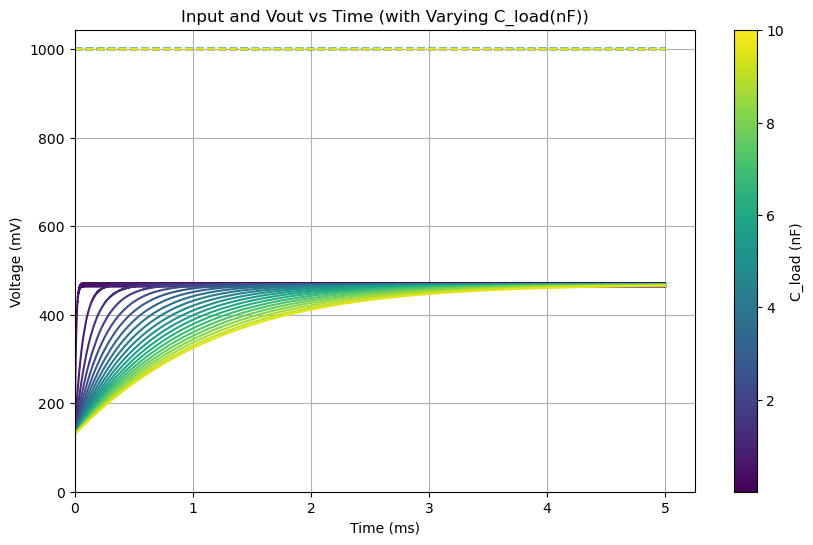

In [13]:
unique_c_values = df1['C(nF)'].unique()
palette = sns.color_palette("viridis", len(unique_c_values))

plt.figure(figsize=(10, 6))

for i, c_value in enumerate(sorted(unique_c_values)):
    df_c = df1[df1['C(nF)'] == c_value]
    color = palette[i]  
    plt.plot(df_c['Time (ms)'], df_c['Input (mV)'], color=color, label=f'C={c_value} nF', linestyle='--')
    plt.plot(df_c['Time (ms)'], df_c['Vout (mV)'], color=color)

plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')
plt.title('Input and Vout vs Time (with Varying C_load(nF))')
plt.grid(True)

plt.xlim(left=0)
plt.ylim(bottom=0)

sm = plt.cm.ScalarMappable(cmap="viridis", norm=plt.Normalize(vmin=min(unique_c_values), vmax=max(unique_c_values)))
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('C_load (nF)')

plt.show()


##### Insights from the Plot:

1. **Voltage Behavior**: For a **DC source of 1V**, the **Input voltage** is expected to remain constant at **1000 mV**, while the **Output voltage** exhibits a transient response before stabilizing over time.
2. **Capacitance Effect**: The **Output voltage** rise time increases with larger capacitance values (indicated by yellow curves), reflecting slower charging of the capacitor, while smaller capacitances (purple curves) settle more quickly.
3. **General Observation**: The plot demonstrates the effect of varying load capacitance on the transient response in a DC circuit, where higher capacitances lead to a delayed steady-state output.

- #### Observations on voltage ripple and settling time with `C_load`

In [ ]:
df2 = pd.read_csv("results/comprehensive_analysis_C1.csv")
df2.describe()

,Capacitance (C1) [nF],Peak Voltage [mV],Min Voltage [mV],Ripple Voltage [mV],Settling Time (ms)
count,21.000000,21.000000,21.000000,21.000000,21.000000
mean,5.010000,468.121983,129.625931,338.496049,1.918935
std,3.102418,1.179468,0.000000,1.179462,1.131082
min,0.010000,465.437531,129.625931,335.811615,0.041319
25%,2.510000,467.832536,129.625931,338.206589,1.001752
50%,5.010000,468.453944,129.625931,338.828027,1.965315
75%,7.510000,468.532175,129.625931,338.906229,2.881319
max,10.010000,471.293241,129.625931,341.667295,3.577315


The table presents statistical data on the performance of a 2:1 switched capacitor DC-DC converter with varying load capacitance. Key insights include:

1. **Peak Voltage**: The average peak voltage is 468.12 mV, with a slight variation (std = 1.18 mV) across the capacitance range, peaking at 471.29 mV and dropping to 465.44 mV.
  
2. **Ripple Voltage**: The ripple voltage is consistent with a mean of 338.50 mV, showing minimal fluctuation (std = 1.18 mV). It ranges from 335.81 mV to 341.67 mV, indicating stable performance.

3. **Settling Time**: Settling time averages around 1.92 ms, with a significant increase as capacitance rises. The max settling time is 3.58 ms, highlighting the slower stabilization for larger capacitance values.

These results suggest that as capacitance increases, the system maintains steady performance with minimal ripple, but settling time becomes longer.

In [8]:
df2

,Capacitance (C1) [nF],Peak Voltage [mV],Min Voltage [mV],Ripple Voltage [mV],Settling Time (ms)
0,0.01,471.293241,129.625931,341.667295,0.041319
1,0.51,468.891829,129.625931,339.265883,0.233319
2,1.01,468.678981,129.625931,339.053035,0.425319
3,1.51,468.599409,129.625931,338.973463,0.617319
4,2.01,468.557775,129.625931,338.931859,0.809439
5,2.51,468.532175,129.625931,338.906229,1.001752
6,3.01,468.514770,129.625931,338.888824,1.197319
7,3.51,468.501866,129.625931,338.875949,1.389319
8,4.01,468.490452,129.625931,338.864505,1.581319
9,4.51,468.476564,129.625931,338.850617,1.773319


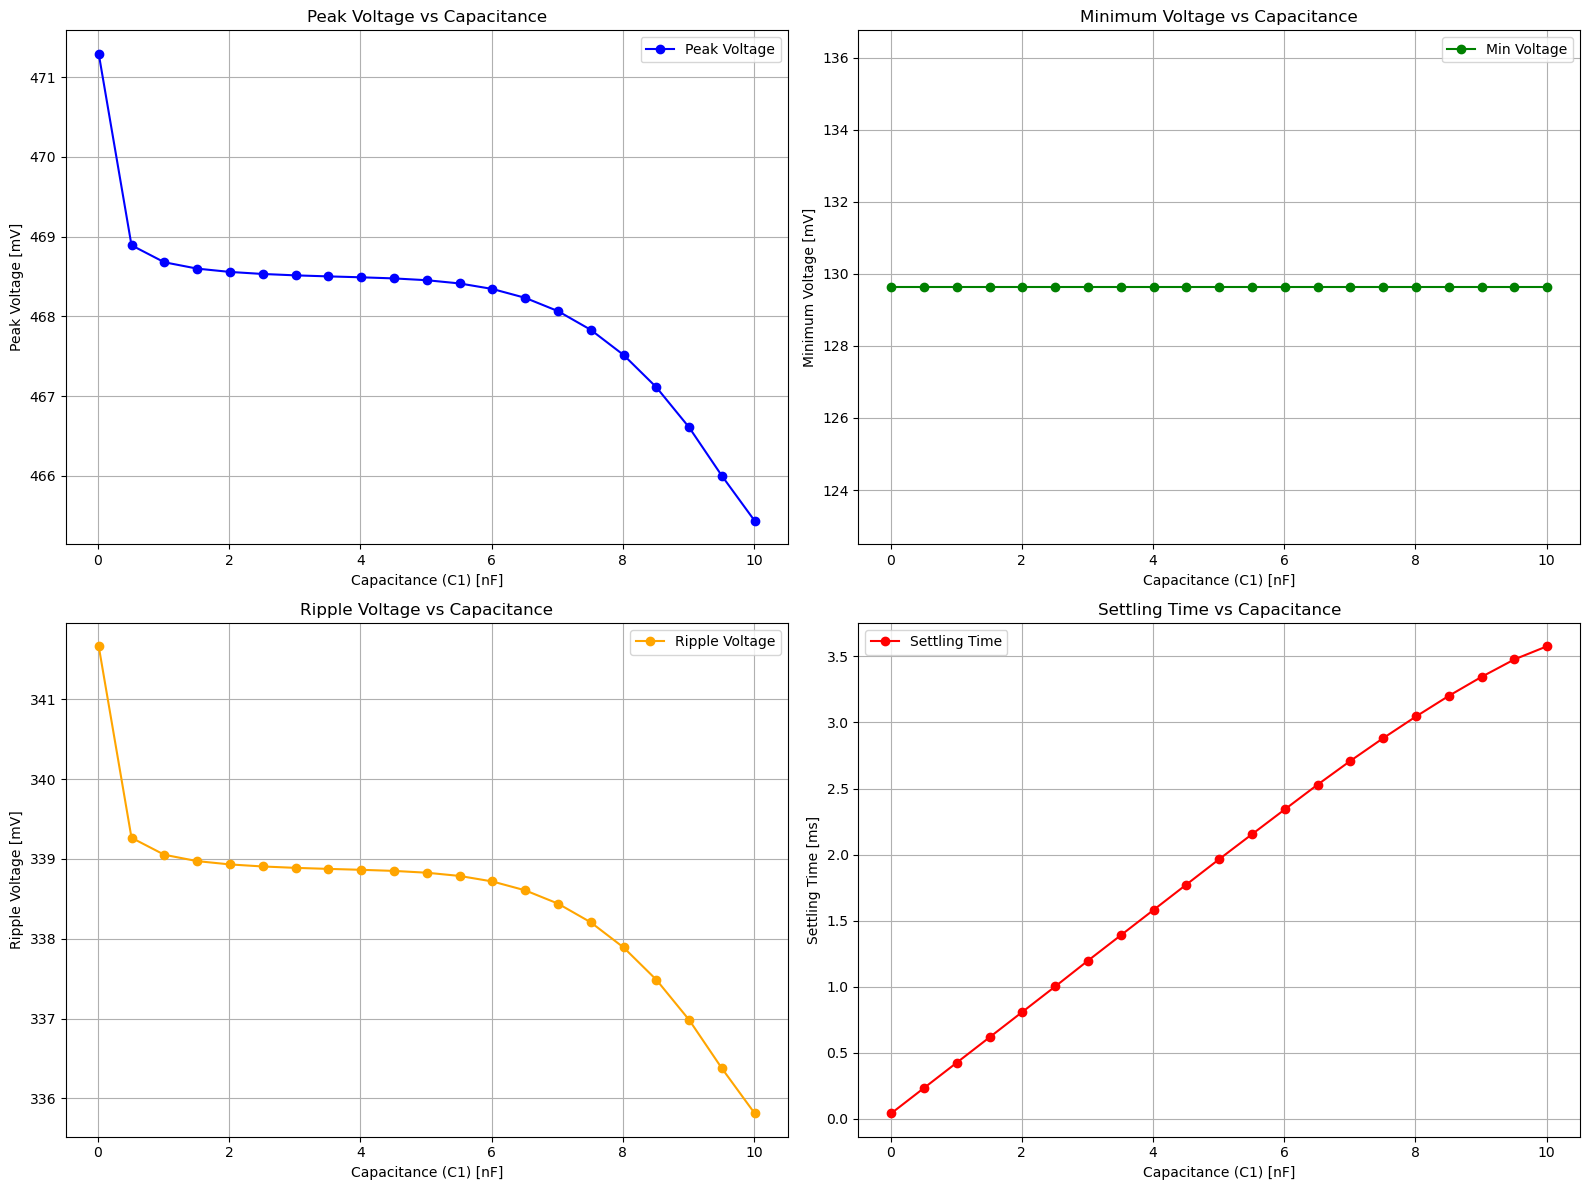

In [9]:

plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
plt.plot(df2['Capacitance (C1) [nF]'], df2['Peak Voltage [mV]'], marker='o', label='Peak Voltage', color='blue')
plt.xlabel('Capacitance (C1) [nF]')
plt.ylabel('Peak Voltage [mV]')
plt.title('Peak Voltage vs Capacitance')
plt.grid(True)
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(df2['Capacitance (C1) [nF]'], df2['Min Voltage [mV]'], marker='o', label='Min Voltage', color='green')
plt.xlabel('Capacitance (C1) [nF]')
plt.ylabel('Minimum Voltage [mV]')
plt.title('Minimum Voltage vs Capacitance')
plt.grid(True)
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(df2['Capacitance (C1) [nF]'], df2['Ripple Voltage [mV]'], marker='o', label='Ripple Voltage', color='orange')
plt.xlabel('Capacitance (C1) [nF]')
plt.ylabel('Ripple Voltage [mV]')
plt.title('Ripple Voltage vs Capacitance')
plt.grid(True)
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(df2['Capacitance (C1) [nF]'], df2['Settling Time (ms)'], marker='o', label='Settling Time', color='red')
plt.xlabel('Capacitance (C1) [nF]')
plt.ylabel('Settling Time [ms]')
plt.title('Settling Time vs Capacitance')
plt.grid(True)
plt.legend()

plt.tight_layout()

plt.show()


Based on the transient analysis results of varying load capacitance for a 2:1 switched capacitor DC-DC converter with a frequency of 250 kHz and switch capacitance of 10 pF, the following insights were observed:

1. **Peak Voltage**: The peak voltage was found to slightly decrease as the load capacitance increased. Starting from 471.29 mV at 0.01 nF, it gradually reduced to 465.44 mV at 10.01 nF. This indicates that the system's ability to maintain a high voltage diminishes with larger capacitance, suggesting that increasing load capacitance has a minor effect on the converter’s voltage regulation.

2. **Ripple Voltage**: The ripple voltage showed a marginal decrease from 341.67 mV to 335.81 mV as the load capacitance increased. This implies that larger load capacitances help in smoothing the voltage output more effectively, thereby reducing voltage fluctuations.

3. **Settling Time**: An increase in settling time was observed with an increase in load capacitance. Settling time started at 0.041 ms for 0.01 nF and rose to 3.577 ms for 10.01 nF. This suggests that larger capacitances result in slower stabilization times after transient events, likely due to the increased time required for the larger capacitors to charge/discharge.

### Key Insights:
- **Larger Load Capacitance**: As the load capacitance increases, the peak voltage slightly reduces, ripple voltage decreases, and settling time increases. This reveals a trade-off where increasing capacitance improves voltage stability (reduced ripple) but results in slower transient responses (longer settling time).
- **Optimization**: The challenge lies in balancing load capacitance to minimize ripple and settling time while maintaining the peak voltage within the desired range.

These insights provide a framework for optimizing load capacitance in DC-DC converter systems to achieve the desired performance.

## Optimal Capacitance Determination

In [10]:

scaler = MinMaxScaler()
df2[['Ripple Voltage [mV]', 'Settling Time (ms)']] = scaler.fit_transform(
    df2[['Ripple Voltage [mV]', 'Settling Time (ms)']]
)


def compute_objective(alpha, df):
    
    w1 = np.exp(alpha) / (np.exp(alpha) + np.exp(1 - alpha))
    w2 = np.exp(1 - alpha) / (np.exp(alpha) + np.exp(1 - alpha))
 
    df['Objective'] = w1 * df['Ripple Voltage [mV]'] + w2 * df['Settling Time (ms)']
    

    X = df[['Capacitance (C1) [nF]']]
    y = df['Objective']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
   
    model = GradientBoostingRegressor(random_state=42)
    model.fit(X_train, y_train)
 
    df['Predicted_Objective'] = model.predict(X)
    
    return df['Predicted_Objective'].min()


result = minimize(
    lambda alpha: compute_objective(alpha, df2.copy()),  
    x0=0.5, 
    bounds=[(0, 1)],  
    method='L-BFGS-B'
)

optimal_alpha = result.x[0]
w1 = np.exp(optimal_alpha) / (np.exp(optimal_alpha) + np.exp(1 - optimal_alpha))
w2 = np.exp(1 - optimal_alpha) / (np.exp(optimal_alpha) + np.exp(1 - optimal_alpha))


df2['Objective'] = w1 * df2['Ripple Voltage [mV]'] + w2 * df2['Settling Time (ms)']
X = df2[['Capacitance (C1) [nF]']]
y = df2['Objective']

model = GradientBoostingRegressor(random_state=42)
model.fit(X, y)

df2['Predicted_Objective'] = model.predict(X)

optimal_index = df2['Predicted_Objective'].idxmin()
optimal_capacitance = df2.loc[optimal_index, 'Capacitance (C1) [nF]']

print(f"Optimal Alpha: {optimal_alpha}")
print(f"Optimal Weights: w1 = {w1}, w2 = {w2}")
print(f"Optimal Capacitance: {optimal_capacitance} nF")


Optimal Alpha: 0.0
Optimal Weights: w1 = 0.2689414213699951, w2 = 0.7310585786300049
Optimal Capacitance: 0.51 nF




- **Frequency (F_clk):** 250 KHz  
- **Optimal Capacitance Value:** 0.51 nF  

The optimal capacitance value of 0.51 nF was determined based on transient analysis under the specified operating conditions.


 ####  Varying Clock Frequency (`F_clk`) Without Load  
**Objective:**  
  To study the effect of clock frequency variation on the converter's transient response with `C_load = 0.5 nF` under no-load conditions. Frequency ranges from `20 kHz` to `1020 kHz`.  
  
  
 

 

  - #### Transient response for a range of `F_clk`.

In [15]:

csv_file_path = 'results/frequency_sweep_simulation_results.csv'
df3 = pd.read_csv(csv_file_path)
sweep_frequencies = df3['Frequency (KHz)'].unique()
print(sweep_frequencies)


[  20   70  120  170  220  270  320  370  420  470  520  570  620  670
  720  770  820  870  920  970 1020]


C:\Users\IMRAN NAZIR\AppData\Local\Temp\ipykernel_13844\2005290770.py:22: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


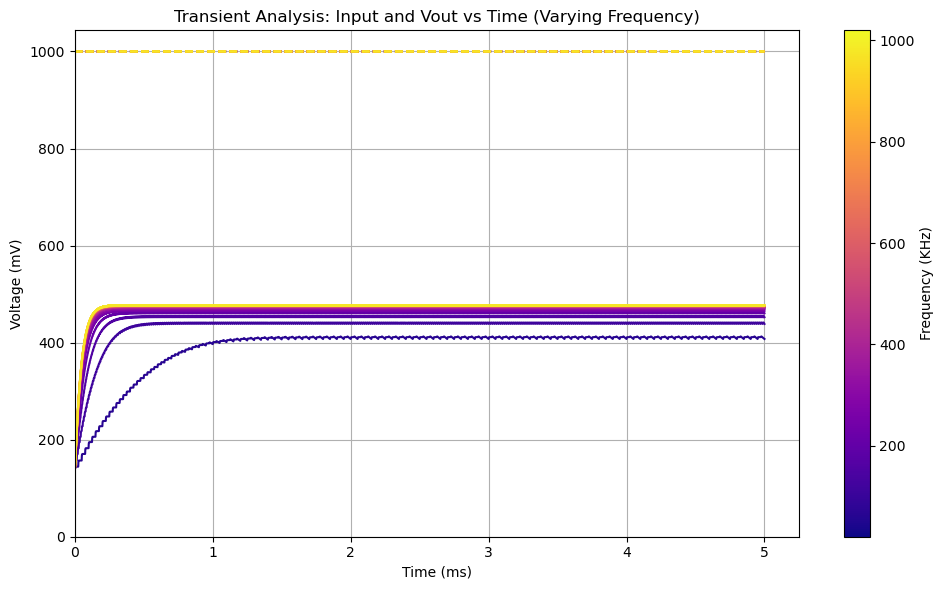

In [17]:

palette = sns.color_palette("plasma", len(sweep_frequencies))


plt.figure(figsize=(10, 6))

for i, freq in enumerate(sorted(sweep_frequencies)):
    df_freq = df3[df3['Frequency (KHz)'] == freq]
    color = palette[i]  # Assign color based on frequency
    plt.plot(df_freq['Time (ms)'], df_freq['Input (mV)'], color=color, linestyle='--', label=f'Input @ {freq} KHz')
    plt.plot(df_freq['Time (ms)'], df_freq['Vout (mV)'], color=color, label=f'Vout @ {freq} KHz')

plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')
plt.title('Transient Analysis: Input and Vout vs Time (Varying Frequency)')
plt.grid(True)

plt.xlim(left=0)
plt.ylim(bottom=0)

sm = plt.cm.ScalarMappable(cmap="plasma", norm=plt.Normalize(vmin=min(sweep_frequencies), vmax=max(sweep_frequencies)))
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Frequency (KHz)')

plt.tight_layout()
plt.show()


### Insights from Frequency Sweep Analysis:

1. **Input Voltage Stability**: The input voltage remains constant at approximately 1V DC across all frequencies, as expected for a stable DC source.

2. **Output Voltage Behavior**: The output voltage (`Vout`) shows transient behavior initially, with a settling time that varies with the frequency. Higher frequencies tend to stabilize the output voltage quicker compared to lower frequencies.

3. **Impact of Frequency**: The ripple in the output voltage reduces at higher frequencies, indicating better filtering and stability in the circuit's response.

4. **General Observation**: As the frequency increases, the circuit exhibits improved transient performance, demonstrating the dependency of circuit stability on operating frequency during a frequency sweep.

- #### Observations on voltage ripple and settling time with `C_load`

In [14]:
file_path = "results/comprehensive_analysis_F_Osc.csv"
df4 = pd.read_csv(file_path)

In [19]:
df4.describe()

,Frequency (KHz),Peak Voltage (mV),Min Voltage (mV),Ripple Voltage (mV),Settling Time (ms)
count,21.000000,21.000000,21.000000,21.000000,21.000000
mean,520.000000,468.821731,129.625931,339.195799,0.230994
std,310.241841,15.661992,0.000000,15.661996,0.202073
min,20.000000,412.795156,129.625931,283.169210,0.159279
25%,270.000000,469.984829,129.625931,340.358913,0.161576
50%,520.000000,475.483775,129.625931,345.857859,0.166056
75%,770.000000,476.771981,129.625931,347.146034,0.190093
max,1020.000000,477.253973,129.625931,347.628057,1.076313


The table presents statistical data on the performance of a system with varying frequency and its corresponding effects on parameters like peak voltage, ripple voltage, and settling time. Key insights include:

1. **Frequency:**
   - The average operating frequency is 520 KHz, with values ranging from 20 KHz to 1020 KHz.
   - A standard deviation of 310.24 KHz indicates a wide variation in operating frequencies.

2. **Peak Voltage:**
   - The mean peak voltage is 468.82 mV, with a standard deviation of 15.66 mV, reflecting some variation in the voltage levels across the tested conditions.
   - The peak voltage ranges from 412.79 mV to 477.25 mV. This suggests the system performs efficiently but shows a small degree of variability under different frequencies.

3. **Ripple Voltage:**
   - The mean ripple voltage is 339.19 mV, closely matching the behavior of peak voltage due to the linear relationship between them.
   - The ripple voltage spans from 283.17 mV to 347.63 mV, with minimal fluctuation (std = 15.66 mV), suggesting stable output.

4. **Settling Time:**
   - Settling time averages at 0.231 ms, with a range from 0.159 ms to 1.076 ms.
   - The higher settling time at increased frequencies indicates slower stabilization, likely due to the dynamic response of the system.

These findings can guide tuning the system parameters for optimal performance, depending on the desired trade-off between stability and response time.

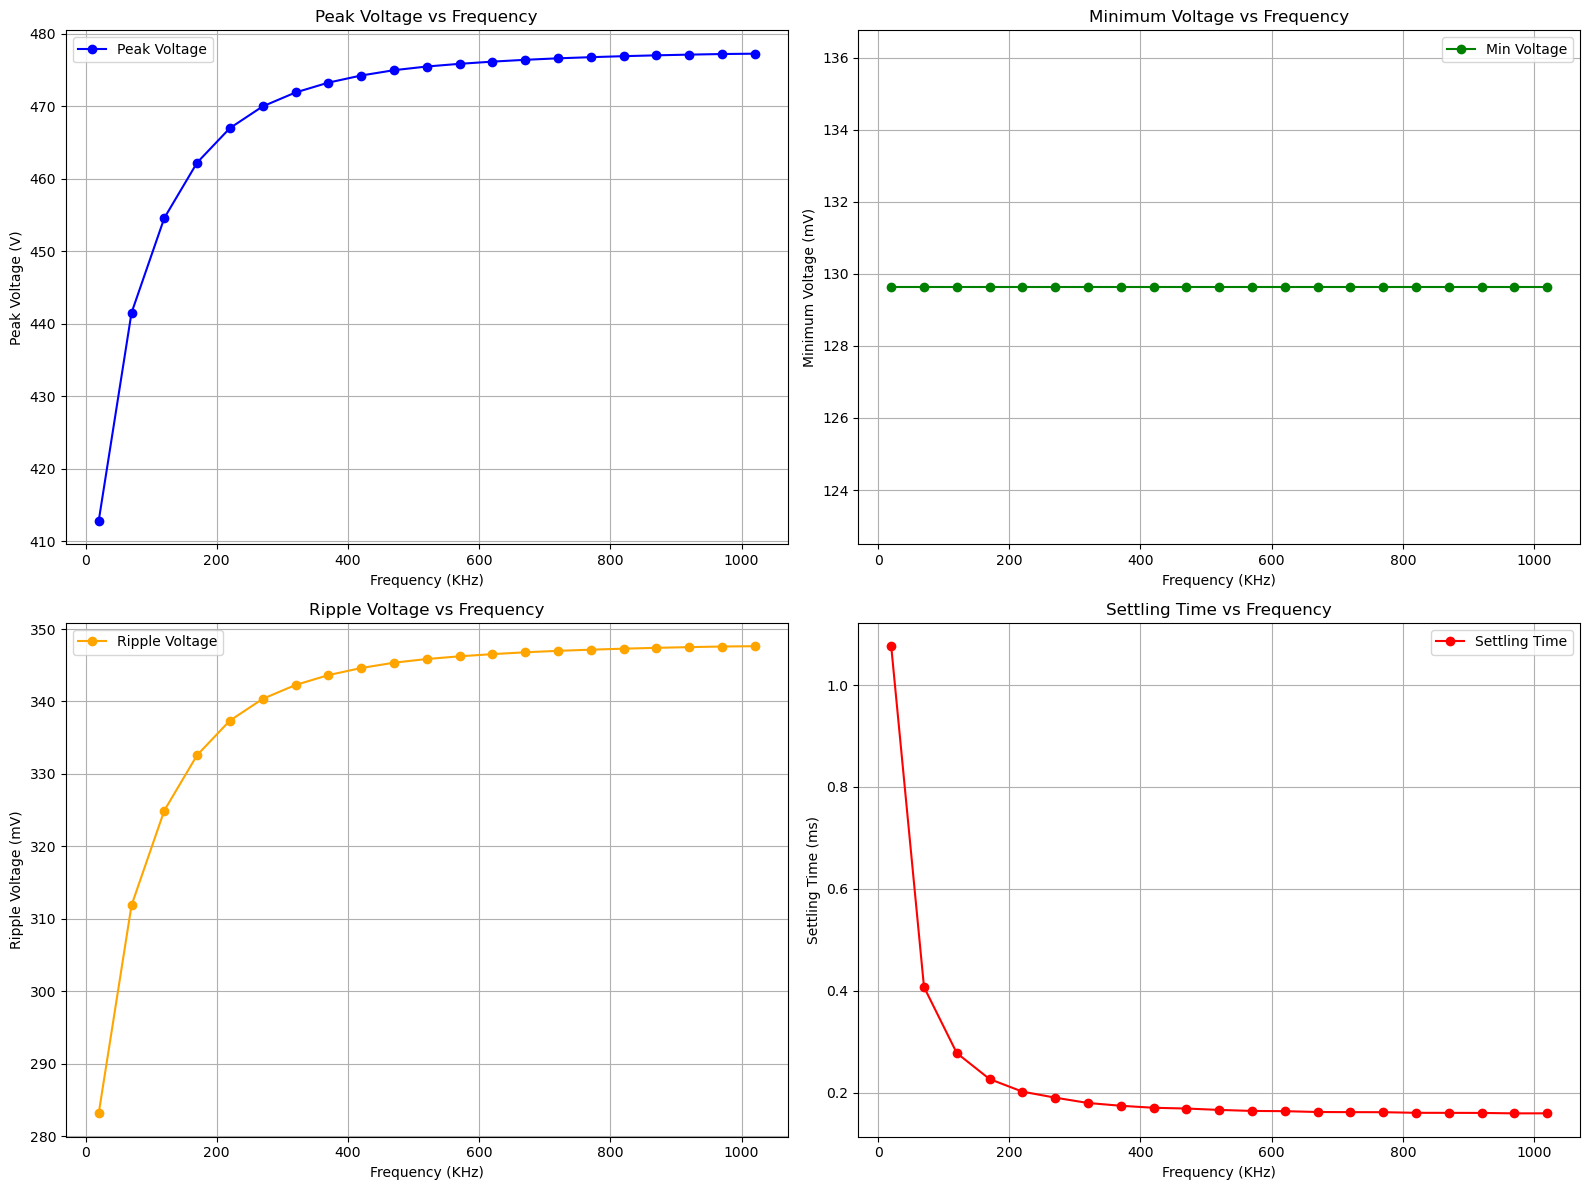

In [20]:

plt.figure(figsize=(16, 12))


plt.subplot(2, 2, 1)
plt.plot(df4['Frequency (KHz)'], df4['Peak Voltage (mV)'], marker='o', label='Peak Voltage', color='blue')
plt.xlabel('Frequency (KHz)')
plt.ylabel('Peak Voltage (V)')
plt.title('Peak Voltage vs Frequency')
plt.grid(True)
plt.legend()


plt.subplot(2, 2, 2)
plt.plot(df4['Frequency (KHz)'], df4['Min Voltage (mV)'], marker='o', label='Min Voltage', color='green')
plt.xlabel('Frequency (KHz)')
plt.ylabel('Minimum Voltage (mV)')
plt.title('Minimum Voltage vs Frequency')
plt.grid(True)
plt.legend()


plt.subplot(2, 2, 3)
plt.plot(df4['Frequency (KHz)'], df4['Ripple Voltage (mV)'], marker='o', label='Ripple Voltage', color='orange')
plt.xlabel('Frequency (KHz)')
plt.ylabel('Ripple Voltage (mV)')
plt.title('Ripple Voltage vs Frequency')
plt.grid(True)
plt.legend()


plt.subplot(2, 2, 4)
plt.plot(df4['Frequency (KHz)'], df4['Settling Time (ms)'], marker='o', label='Settling Time', color='red')
plt.xlabel('Frequency (KHz)')
plt.ylabel('Settling Time (ms)')
plt.title('Settling Time vs Frequency')
plt.grid(True)
plt.legend()


plt.tight_layout()


plt.show()  

The Graph provides insights into the transient analysis of a 2:1 switched capacitor DC-DC converter with varying clock frequencies, while maintaining a load capacitance of 0.5nF and switch capacitance of 10pF. Key observations include:

1. **Peak Voltage**: The peak voltage increases with clock frequency, starting from 412.80 mV at 20 kHz to 477.25 mV at 1020 kHz. This suggests that higher clock frequencies lead to a higher peak voltage, indicating improved voltage regulation as the frequency increases.

2. **Ripple Voltage**: The ripple voltage also increases with frequency, from 283.17 mV at 20 kHz to 347.63 mV at 1020 kHz. This indicates that higher frequencies may increase the fluctuation in the output voltage, potentially affecting the stability of the converter.

3. **Settling Time**: The settling time decreases significantly as the clock frequency increases. Starting at 1.08 ms at 20 kHz, it drops to 0.16 ms at 1020 kHz. This shows that higher clock frequencies allow the system to reach a stable state faster after a transient event, improving transient response.

### Key Insights:
- **Increasing Clock Frequency**: As the clock frequency increases, the peak voltage rises, but ripple voltage also increases. However, the settling time improves, suggesting that higher frequencies provide faster stabilization, but with trade-offs in ripple control.
- **Optimization Consideration**: To balance between faster settling times and acceptable ripple levels, selecting an optimal clock frequency is crucial based on the specific requirements of the application.

## Optimal Frequency Determination

In [ ]:
scaler = MinMaxScaler()
df4[['Ripple Voltage (mV)', 'Settling Time (ms)']] = scaler.fit_transform(
    df4[['Ripple Voltage (mV)', 'Settling Time (ms)']]
)

def compute_objective(alpha, df):
    w1 = np.exp(alpha) / (np.exp(alpha) + np.exp(1 - alpha))
    w2 = np.exp(1 - alpha) / (np.exp(alpha) + np.exp(1 - alpha))
    df['Objective'] = w1 * df['Ripple Voltage (mV)'] + w2 * df['Settling Time (ms)']
    X = df[['Frequency (KHz)']]
    y = df['Objective']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = GradientBoostingRegressor(random_state=42)
    model.fit(X_train, y_train)
    df['Predicted_Objective'] = model.predict(X)
    return df['Predicted_Objective'].min()

result = minimize(
    lambda alpha: compute_objective(alpha, df4.copy()),
    x0=0.5,
    bounds=[(0, 1)],
    method='L-BFGS-B'
)

optimal_alpha = result.x[0]
w1 = np.exp(optimal_alpha) / (np.exp(optimal_alpha) + np.exp(1 - optimal_alpha))
w2 = np.exp(1 - optimal_alpha) / (np.exp(optimal_alpha) + np.exp(1 - optimal_alpha))

df4['Objective'] = w1 * df4['Ripple Voltage (mV)'] + w2 * df4['Settling Time (ms)']
X = df4[['Frequency (KHz)']]
y = df4['Objective']

model = GradientBoostingRegressor(random_state=42)
model.fit(X, y)

df4['Predicted_Objective'] = model.predict(X)

optimal_index = df4['Predicted_Objective'].idxmin()
optimal_frequency = df4.loc[optimal_index, 'Frequency (KHz)']

print(f"Optimal Alpha: {optimal_alpha}")
print(f"Optimal Weights: w1 = {w1}, w2 = {w2}")
print(f"Optimal Frequency: {optimal_frequency} KHz")


Optimal Alpha: 0.0
Optimal Weights: w1 = 0.2689414213699951, w2 = 0.7310585786300049
Optimal Frequency: 170 KHz




- **Capacitance (C_load):** 0.5 nF  
- **Optimal Frequency:** 170 KHz  

The optimal frequency of 170 KHz was determined based on transient analysis with a fixed capacitance load of 0.5 nF.


### 3. Varying Load Resistance (`R_load`) 
- **Objective:**  
  To assess the transient performance of the converter with `R_load` varied from `10 kΩ` to `1010 kΩ`, `C_load = 0.5 nF`, and `F_clk = 250 kHz`.  


 
  - ### Transient response for different `R_load` values.  
 


In [19]:
csv_file_path = 'results/load_simulation_results.csv'
df5 = pd.read_csv(csv_file_path)
load_resistances = df5['R(kΩ)'].unique()
print(load_resistances)

[  10   60  110  160  210  260  310  360  410  460  510  560  610  660
  710  760  810  860  910  960 1010]


C:\Users\IMRAN NAZIR\AppData\Local\Temp\ipykernel_13844\2837040201.py:22: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


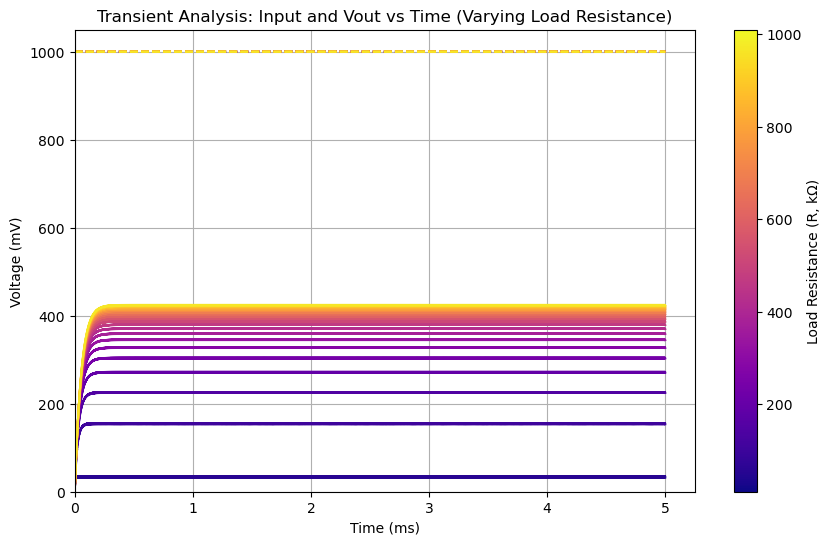

In [20]:

palette = sns.color_palette("plasma", len(load_resistances))

plt.figure(figsize=(10, 6))


for i, r_value in enumerate(sorted(load_resistances)):
    df_r = df5[df5['R(kΩ)'] == r_value]
    color = palette[i]  
    plt.plot(df_r['Time (ms)'], df_r['Input (mV)'], color=color, linestyle='--', label=f'R={r_value} kΩ (Input)')
    plt.plot(df_r['Time (ms)'], df_r['Vout (mV)'], color=color, label=f'R={r_value} kΩ (Vout)')


plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')
plt.title('Transient Analysis: Input and Vout vs Time (Varying Load Resistance)')
plt.grid(True)
plt.xlim(left=0)
plt.ylim(bottom=0)

sm = plt.cm.ScalarMappable(cmap="plasma", norm=plt.Normalize(vmin=min(load_resistances), vmax=max(load_resistances)))
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Load Resistance (R, kΩ)')

plt.show()


### Insights from Load Resistance Sweep Analysis:

1. **Input Voltage Stability**: The input voltage remains constant at approximately 1V DC across all load resistances, as expected for a stable DC source.

2. **Output Voltage Behavior**: The output voltage (`Vout`) shows transient behavior initially, with a settling time that varies with the load resistance. Higher load resistances tend to stabilize the output voltage quicker compared to lower load resistances.

3. **Impact of Load Resistance**: The ripple in the output voltage reduces at higher load resistances, indicating better filtering and stability in the circuit's response.

4. **General Observation**: As the load resistance increases, the circuit exhibits improved transient performance, demonstrating the dependency of circuit stability on load resistance during a transient analysis.



 
- ### The impact of varying `R_load` on voltage ripple and efficiency.  

In [24]:
file_path = "results/comprehensive_analysis_R1.csv"
df6 = pd.read_csv(file_path)

In [27]:
df6.describe()

,Resistance (KΩ),Peak Voltage (mV),Min Voltage (mV),Ripple Voltage (mV),Settling Time (ms)
count,21.000000,21.000000,21.000000,21.000000,21.000000
mean,510.000000,346.977617,0.002048,346.975567,0.170805
std,310.241841,100.570891,0.001244,100.569853,0.046572
min,10.000000,35.677657,0.000040,35.677616,0.018657
25%,260.000000,328.108758,0.001045,328.107715,0.168829
50%,510.000000,387.575150,0.002050,387.573093,0.190657
75%,760.000000,411.944717,0.003055,411.941648,0.197315
max,1010.000000,424.682140,0.004020,424.678117,0.201315


The table provides statistical data summarizing the performance of a system with varying resistances (in KΩ) and its corresponding impact on peak voltage, ripple voltage, and settling time. Key insights are:
1. **Resistance**
- **Mean:** 510 KΩ is the average resistance tested.
- **Range:** Resistance varies widely from 10 KΩ to 1010 KΩ, indicating a diverse dataset.
- **Spread:** The standard deviation of 310.24 KΩ highlights the significant variation in resistance levels.
2. **Peak Voltage**
- **Mean:** The average peak voltage is 346.98 mV.
- **Range:** It spans from a minimum of 35.68 mV to a maximum of 424.68 mV.
- **Spread:** A standard deviation of 100.57 mV suggests moderate variability in peak voltage across the dataset.
3. **Ripple Voltage**
- **Mean:** The ripple voltage closely matches the peak voltage at 346.98 mV on average, indicating a linear correlation.
- **Range:** Ripple voltage varies from 35.68 mV to 424.68 mV, similar to the peak voltage range.
- **Spread:** The standard deviation of 100.57 mV indicates consistent performance relative to peak voltage.
4. **Settling Time**
- **Mean:** Settling time averages at 0.17 ms, reflecting a fast stabilization time.
- **Range:** It varies from a minimum of 0.0187 ms to a maximum of 0.2013 ms.
- **Spread:** A standard deviation of 0.0466 ms suggests a small, yet noticeable variation in stabilization time under different resistances

This analysis provides a foundation for optimizing the system by fine-tuning resistance levels to achieve desired voltage and performance characteristics.

In [28]:
df6

,Resistance (KΩ),Peak Voltage (mV),Min Voltage (mV),Ripple Voltage (mV),Settling Time (ms)
0,10,35.677657,0.000040,35.677616,0.018657
1,60,155.894190,0.000241,155.893952,0.082773
2,110,226.513609,0.000442,226.513162,0.118657
3,160,272.395521,0.000643,272.394866,0.140624
4,210,304.479808,0.000844,304.478973,0.156656
5,260,328.108758,0.001045,328.107715,0.168829
6,310,345.800072,0.001246,345.798820,0.173266
7,360,359.796762,0.001447,359.795302,0.180952
8,410,370.937586,0.001648,370.935947,0.184656
9,460,379.988909,0.001849,379.987061,0.188656


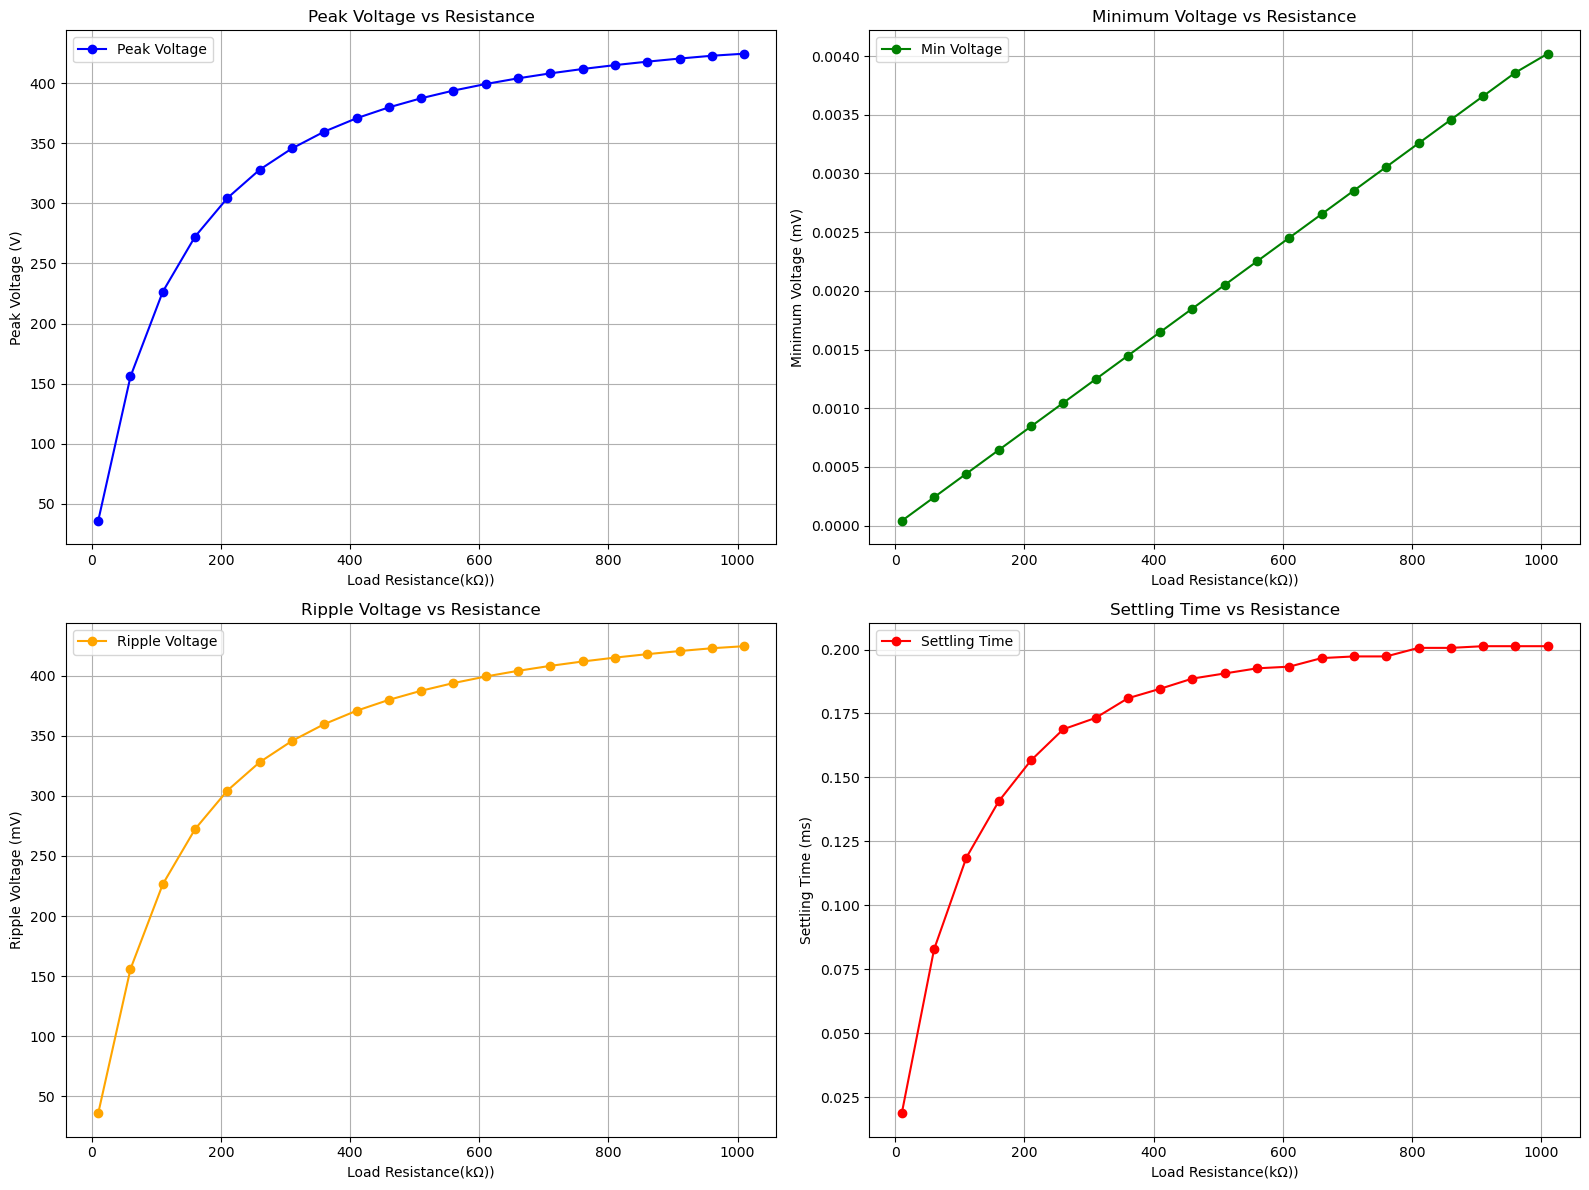

In [ ]:

plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
plt.plot(df6['Resistance (KΩ)'], df6['Peak Voltage (mV)'], marker='o', label='Peak Voltage', color='blue')
plt.xlabel('Load Resistance(kΩ))')
plt.ylabel('Peak Voltage (V)')
plt.title('Peak Voltage vs Resistance')
plt.grid(True)
plt.legend()


plt.subplot(2, 2, 2)
plt.plot(df6['Resistance (KΩ)'], df6['Min Voltage (mV)'], marker='o', label='Min Voltage', color='green')
plt.xlabel('Load Resistance(kΩ))')
plt.ylabel('Minimum Voltage (mV)')
plt.title('Minimum Voltage vs Resistance')
plt.grid(True)
plt.legend()


plt.subplot(2, 2, 3)
plt.plot(df6['Resistance (KΩ)'], df6['Ripple Voltage (mV)'], marker='o', label='Ripple Voltage', color='orange')
plt.xlabel('Load Resistance(kΩ))')
plt.ylabel('Ripple Voltage (mV)')
plt.title('Ripple Voltage vs Resistance')
plt.grid(True)
plt.legend()


plt.subplot(2, 2, 4)
plt.plot(df6['Resistance (KΩ)'], df6['Settling Time (ms)'], marker='o', label='Settling Time', color='red')
plt.xlabel('Load Resistance(kΩ))')
plt.ylabel('Settling Time (ms)')
plt.title('Settling Time vs Resistance')
plt.grid(True)
plt.legend()


plt.tight_layout()
plt.show()  

The Graph shows the relationship between load resistance (ranging from 10 KΩ to 1010 KΩ) and the performance parameters (Peak Voltage, Min Voltage, Ripple Voltage, and Settling Time) at a fixed frequency of 250 kHz, with C_Load = 0.5 nF and C_Switch = 10 pF. Here are the key insights:

1. **Peak Voltage**: 
   - Increases with resistance, from 35.68 mV at 10 KΩ to 424.68 mV at 1010 KΩ.
   - This suggests that as the load resistance increases, the peak voltage output rises.

2. **Min Voltage**:
   - Increases slightly with resistance, but the values remain very small (close to 0).
   - This indicates that the system maintains a low minimum voltage across varying load resistances.

3. **Ripple Voltage**:
   - Increases with resistance, from 35.68 mV at 10 KΩ to 424.68 mV at 1010 KΩ.
   - Ripple voltage is higher at higher resistance, which implies that higher load resistance contributes to greater variations in voltage.

4. **Settling Time**:
   - Slightly increases with resistance, starting at 0.0187 ms at 10 KΩ and rising to 0.2013 ms at 1010 KΩ.
   - The longer settling time at higher resistance suggests that the system requires more time to stabilize as the load resistance increases.

### Key Insights:
- As resistance increases, both peak voltage and ripple voltage increase, while settling time also rises slightly.
- The system behaves with higher voltages and slightly increased instability (due to higher ripple) at higher resistances.


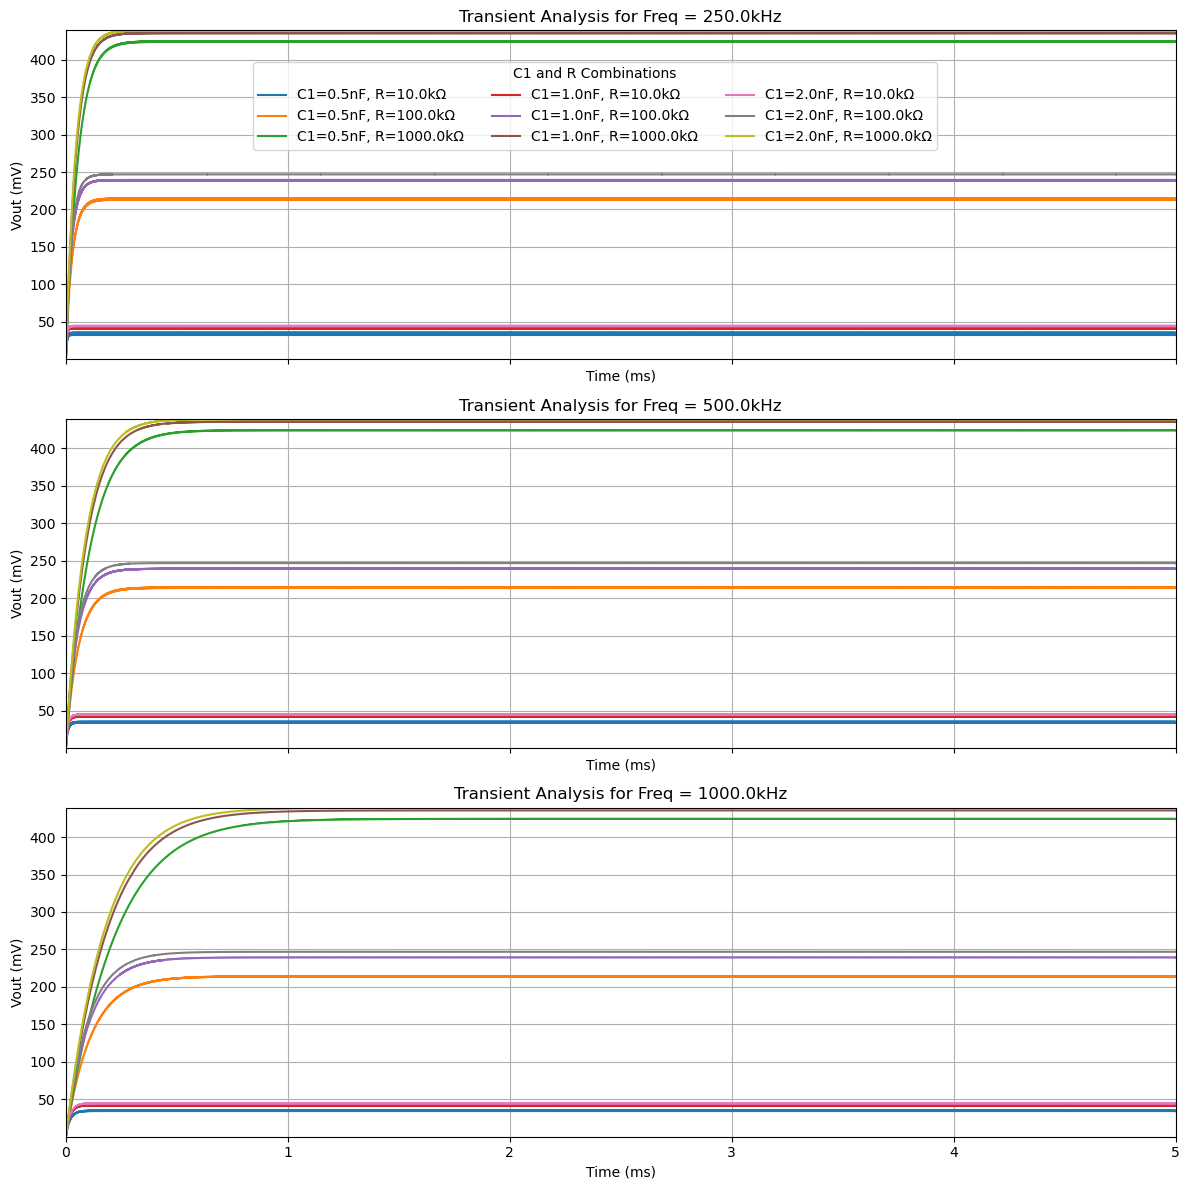

In [31]:
csv_file_path = 'results/simulation_results.csv'
df7 = pd.read_csv(csv_file_path)
fig, axes = plt.subplots(3, 1, figsize=(12, 12), sharex=True, sharey=True)

frequency_values = df7['Clock Frequency (KHz)'].unique()

handles, labels = [], []

for idx, clk_freq_val in enumerate(frequency_values):
    ax = axes[idx]
    
    
    subset_freq = df7[df7['Clock Frequency (KHz)'] == clk_freq_val]
    

    for C1_val in subset_freq['C1 (nF)'].unique():
        for R_val in subset_freq['R (kΩ)'].unique():
            subset = subset_freq[(subset_freq['C1 (nF)'] == C1_val) & 
                                 (subset_freq['R (kΩ)'] == R_val)]
            

            line, = ax.plot(subset['Time (ms)'], subset['Vout (mV)'], label=f'C1={C1_val}nF, R={R_val}kΩ')
            
          
            if idx == 0:
                handles.append(line)
                labels.append(f'C1={C1_val}nF, R={R_val}kΩ')

    ax.set_title(f'Transient Analysis for Freq = {clk_freq_val}kHz')
    ax.set_xlabel('Time (ms)')
    ax.set_ylabel('Vout (mV)')
    ax.grid(True)


plt.setp(axes, xlim=(0, df7['Time (ms)'].max()), ylim=(df7['Vout (mV)'].min(), df7['Vout (mV)'].max()))

fig.legend(handles, labels, title='C1 and R Combinations', loc='upper center', bbox_to_anchor=(0.5, 0.95), ncol=3)

plt.tight_layout()

plt.show()


In [32]:
file_path = "results/comprehensive_analysis.csv"
df8 = pd.read_csv(file_path)

In [34]:
df8.describe()

,Capacitance (nF),Frequency (KHz),Resistance (KΩ),Peak Voltage (mV),Min Voltage (mV),Ripple Voltage (mV),Settling Time (ms)
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,1.166667,583.333333,370.000000,235.807408,0.001487,235.805920,0.234298
std,0.635489,317.744455,455.504792,163.513818,0.001831,163.512157,0.219873
min,0.500000,250.000000,10.000000,34.989797,0.000040,34.989756,0.018165
25%,0.500000,250.000000,10.000000,44.560127,0.000040,44.560086,0.071829
50%,1.000000,500.000000,100.000000,239.370853,0.000402,239.370450,0.172329
75%,2.000000,1000.000000,1000.000000,424.597532,0.004020,424.593508,0.368225
max,2.000000,1000.000000,1000.000000,439.140111,0.004020,439.136088,0.806657


In [35]:
df8

,Capacitance (nF),Frequency (KHz),Resistance (KΩ),Peak Voltage (mV),Min Voltage (mV),Ripple Voltage (mV),Settling Time (ms)
0,0.5,250.0,10.0,35.677657,0.000040,35.677616,0.018657
1,0.5,500.0,10.0,35.218161,0.000040,35.218120,0.037261
2,0.5,1000.0,10.0,34.989797,0.000040,34.989756,0.074657
3,1.0,250.0,10.0,42.362556,0.000040,42.362515,0.018657
4,1.0,500.0,10.0,42.211611,0.000040,42.211570,0.036657
5,1.0,1000.0,10.0,42.136956,0.000040,42.136915,0.072329
6,2.0,250.0,10.0,44.622980,0.000040,44.622939,0.018165
7,2.0,500.0,10.0,44.572636,0.000040,44.572596,0.035666
8,2.0,1000.0,10.0,44.547617,0.000040,44.547576,0.071330
9,0.5,250.0,100.0,214.848816,0.000402,214.848414,0.112634
